# Day 17

## Part 1

- The grid shows how much heat is lost when entering a tile
- The crucibles can't go in a straight line for more than 3 tiles
- Find the path that incurs the minimum heat loss to get from top left to bottom right.

In [42]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown, plot_grid
)

In [4]:
parser = ParseConfig('\n', ParseConfig('', int))

grid = parse_from_file('puzzle_input\\day_17.txt', parser)

Text(0.5, 1.0, 'Check out my $cool$ map')

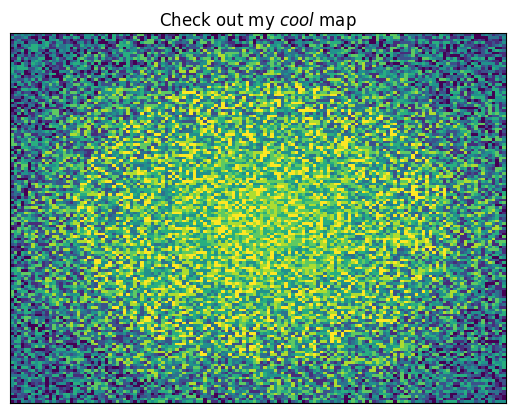

In [10]:
fig, ax = plt.subplots()
plot_grid(grid, ax)
ax.set_title('Check out my $cool$ map')

If there wasn't a path limit we could create a graph with the coolness of each tile as the distance to get there from adjacent tiles. However that isn't enough because the cart has to weave.

Perhaps if we found a minimal 2-wide path then weaving in it would be optimal?

In [30]:
max_row, max_col = len(grid), len(grid[0])
max_dist = max_row * max_col

start = (0, 0)
end = (max_row - 1, max_col - 1)

distances = [[None]*len(row) for row in grid]
unvisited = []
for n_row, row in enumerate(grid):
    for n_col, _ in enumerate(row):
        unvisited.append((n_row, n_col))

# set starting node distance to 0
tile = start
distances[start[0]][start[1]] = 0
while len(unvisited) > 0:
    print(f'{max_dist - len(unvisited)} / {max_dist}', end='\r')
    # find the unvisited node with smallest distance
    shortest = max_dist
    for node in unvisited:
        row, col = node
        distance = distances[row][col]
        # skip nodes that are too far to consider
        if distance is None:
            continue
        # find the shortest distance by comparison
        elif distance < shortest:
            tile = node
            shortest = distances[row][col]

    # look at all unvisited neighbours
    for offset in ((1, 0), (-1, 0), (0, 1), (0, -1)):
        neighbour = tuple([n + o for n, o in zip(tile, offset)])

        # skip visited tiles
        if neighbour not in unvisited:
            continue
        
        # ensure neighbour is in bounds
        nr, nc = neighbour
        if not(0 <= nr < max_row or 0 <= nc < max_col):
            continue

        tr, tc = tile
        # update the cost of going there
        # the cost is this tile's cost plus the cost of entering that tile
        if distances[nr][nc] is None:
            distances[nr][nc] = distances[tr][tc] + grid[nr][nc]
        else:
            distances[nr][nc] = min(
                distances[tr][tc] + grid[nr][nc],
                distances[nr][nc]
            )
    unvisited.remove(tile)


Text(0.5, 1.0, 'Here it is on the $cool$ map')

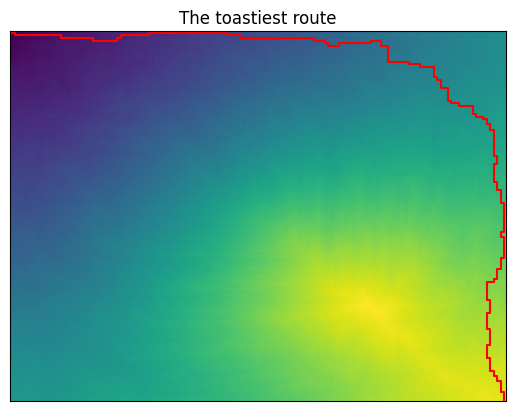

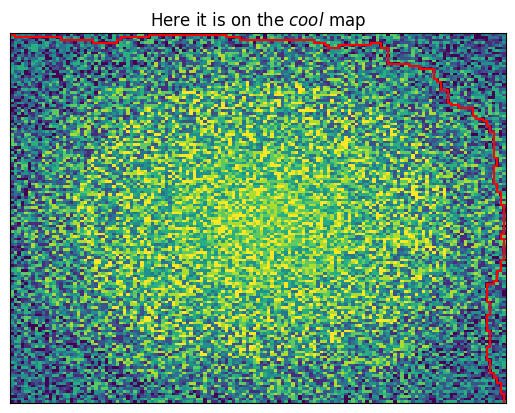

In [53]:
# find the path of least coolsistance
path = []
tile = end
while tile != start:
    path.append(tile)
    best = max_dist
    for offset in ((1, 0), (-1, 0), (0, 1), (0, -1)):
        neighbour = tuple([n + o for n, o in zip(tile, offset)])
        # ensure neighbour is in bounds
        nr, nc = neighbour
        if not(0 <= nr < max_row and 0 <= nc < max_col):
            continue
        if distances[nr][nc] < best:
            best = distances[nr][nc]
            best_tile = neighbour
    tile = best_tile
path.append(start)
path = reversed(path)

# let's take a look!
fig, ax = plt.subplots()
plot_grid(distances, ax)
y, x = list(map(np.array, list(zip(*path))))
ax.plot(x + 0.5, len(grid) - y - 0.5, 'r')
ax.set_title('The toastiest route')

fig, ax = plt.subplots()
plot_grid(grid, ax)
ax.plot(x + 0.5, len(grid) - y - 0.5, 'r')
ax.set_title('Here it is on the $cool$ map')

Going around the edge is definitely optimal from the looks of it and there are quite a few bends but not nearly enough for the crucible.

perhaps it's worth trying to look at all points along the path and seeing what the optimal route is for those points.